In [39]:
!pip install firebase
import requests
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer

Index stored successfully in Firebase database.


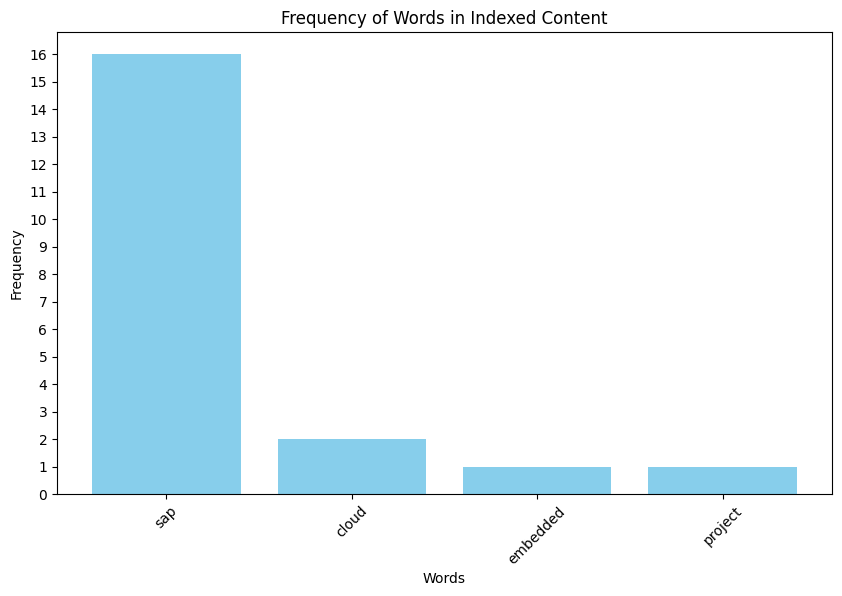

In [111]:
import requests
from bs4 import BeautifulSoup
import re
from firebase import firebase
import matplotlib.pyplot as plt
import urllib.parse


# Initialize Firebase connection
FBconn = firebase.FirebaseApplication('https://tirgul5-f56c9-default-rtdb.firebaseio.com/', None)

# Function to fetch webpage content
def fetch_page(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
            'Referer': 'https://www.google.com/',
            'Connection': 'keep-alive'
        }
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            return soup
        else:
            print("Error: Failed to fetch webpage. Status code:", response.status_code)
            return None
    except Exception as e:
        print("Error: Failed to fetch webpage:", e)
        return None

# Function to index words in webpage content
# Function to index words in webpage content
def index_words(soup, url_id, link_map):
    index = {}
    words = re.findall(r'\b\w+\b', soup.get_text().lower())
    # Temporary words for demonstration
    temp_words = ['sap', 'cloud', 'terms', 'project', 'embedded', 'colab', 'index', 'website', 'chart', 'git']
    for word in words:
        if word in temp_words:
            if word in index:
                index[word]['count'] += 1
                if url_id not in index[word]['url_id_list']:
                    index[word]['url_id_list'].append(url_id)
            else:
                index[word] = {'count': 1, 'url_id_list': [url_id]}
    return index


# Function to store index in Firebase database
def store_index(index):
    if index is not None:
        result = FBconn.post('/tirgul5-f56c9/Index', index)
        print("Index stored successfully in Firebase database.")
    else:
        print("Error: Index is None.")

# Function to generate and display chart
def generate_chart(index):
    if index:
        plt.figure(figsize=(10, 6))
        words = list(index.keys())
        # Get the 'count' value for each word in the index
        frequencies = [word_info['count'] for word_info in index.values()]
        plt.bar(words, frequencies, color='skyblue')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Frequency of Words in Indexed Content')
        plt.xticks(rotation=45)
        plt.yticks(range(0, max(frequencies)+1, 1))  # Adjust y-axis ticks to show increments of 1
        plt.show()
    else:
        print("Error: Index is empty.")


def main():
    url = 'https://www.sap.com/index.html'
    soup = fetch_page(url)
    if soup is None:
        print("Error fetching webpage content")
        return

    # Create a map of all links including the seed
    url_map = {1: url}  # Seed link is assigned number 1
    # Add additional links to the map if needed
    # url_map[2] = 'https://www.sap.com/another_page.html'

    # Store the link map in Firebase under URL_indexer using put method
    FBconn.post('/tirgul5-f56c9/URL_indexer', url_map)

    index = index_words(soup, 1, url_map)  # Pass the URL identifier instead of the URL string
    store_index(index)
    generate_chart(index)


if __name__ == "__main__":
    main()


In [ ]:

from firebase import firebase

# Initialize Firebase connection
firebase = firebase.FirebaseApplication('https://tirgul5-f56c9-default-rtdb.firebaseio.com/', None)

# Get and print data from the "avocado" collection
result = firebase.get('/tirgul5-f56c9/Students', None)
print(result)


{'-NqMYL3G_WRAvSb7rr5s': {'Courses': ['a', 'b', 'c', 'd', 'e'], 'Fname': 'vachiler', 'Name': 'Shahar', 'TV': 'news', 'mail': 'gggggg'}, '-NqMZK4QpRpeH1r7Et5B': {'Courses': ['a', 'c', 'b', 'cv'], 'Fname': 'ddd', 'Name': 'aa', 'TV': 'dfd', 'mail': 'dd'}, '-NqM_BL5kEUrrBqalBaJ': {'Courses': ['"Introduction to cloud computing"', '             "Algorithms for texts and sequences"', '             "Computer graphics"', '             "Compilation theory"', '             "Computer networks"', '             "Digital signal processing DSP"', '             "Seminar on matching project templates"'], 'Fname': 'Dalal', 'Name': 'Shachar', 'TV': 'The expanse', 'mail': 'shchar.dalal@e.braude.ac.il'}, '-NqM_TW6YT6pd4sE4JDn': {'Courses': ['"Cloud Computing"', '             "Algorithms for texts and sequences"', '             "Seminar in patterns"', '             "Final Project part 1"', '             "Computing Networks"', '             "Compilation Theory"'], 'Fname': 'Vachiler', 'Name': 'Shahar', 'TV': 